In [1]:
import pandas

In [44]:
train = pandas.read_csv('train.csv')    #Importez datele din fisierul ./train.csv
train_copy = train.copy()
train                                   #Afisez lista

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [45]:
#Inlocuiesc unele cuvinte cu cifre, pentru a putea fi prelucrate
#Folosesc inplace=True pentru ca schimbarile sa fie visibile listei actuale

train['Sex'].replace('male', 0, inplace=True)
train['Sex'].replace('female', 1, inplace=True)

train['Embarked'].replace('S', 1,inplace=True)
train['Embarked'].replace('C', 2,inplace=True)
train['Embarked'].replace('Q', 3,inplace=True)
train['Embarked'].replace('NaN', 0,inplace=True)

train.fillna(0, inplace=True)                           #Inlocuiesc valorile nule (NaN)
train.drop('Name', axis=1, inplace=True)                #Arunc coloana Name, deoarece aceasta nu joaca niciun rol in clasificare

In [46]:
train_dum = train.drop('Cabin', axis=1)                #Arunc coloana 'Cabin'

In [47]:
#Arunc coloana Survived din lista initiala, si o salvez in lista survived
input_data = train_dum.drop(['Survived', 'Ticket'], axis=1)      
survived = train_dum.Survived

In [48]:
from sklearn.ensemble import RandomForestClassifier  #Folosesc metoda RandomForestClassifier pentru a invata modelul actual

In [49]:
model = RandomForestClassifier()   #Creez o copie a 'clasei' RandomForestClassifier

In [75]:
model.fit(input_data[:-5], survived[:-5])    #Incep procesul de invatare a masinei, lasand 5 valoari pentru a le testa mai apoi 
                                             #(Nota: Ar fi mai bine testarea pe 30% din toate datele)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [76]:
prediction = model.predict(input_data[-5:])              #Testez predictia modelului folosind ultimele 5 elemente
prediction                     

array([0, 1, 0, 1, 0], dtype=int64)

In [77]:
import matplotlib.pyplot as plt

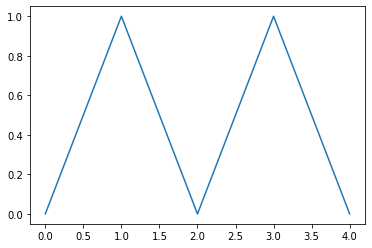

In [97]:
plt.plot(prediction, label="Prediction")

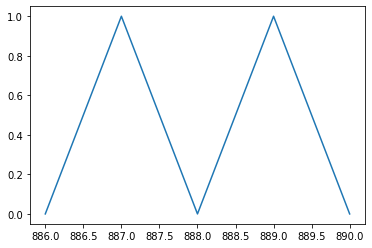

In [85]:
plt.plot(train_copy['Survived'][-5:], label="Real")

In [87]:
from sklearn.metrics import mean_absolute_error

In [90]:
print('Rata de eroare: ', mean_absolute_error(prediction, train_copy['Survived'][-5:]))

Rata de eroare:  0.0


In [10]:
#Citesc datele de finale
test = pandas.read_csv('test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [11]:
#Inlocuiesc unele cuvinte cu cifre, pentru a putea fi prelucrate
#Folosesc inplace=True pentru ca schimbarile sa fie visibile listei actuale

test['Sex'].replace('male', 0, inplace=True)
test['Sex'].replace('female', 1, inplace=True)

test['Embarked'].replace('S', 1,inplace=True)
test['Embarked'].replace('C', 2,inplace=True)
test['Embarked'].replace('Q', 3,inplace=True)
test['Embarked'].replace('NaN', 0,inplace=True)

test.fillna(0, inplace=True)                           #Inlocuiesc valorile nule (NaN)
test.drop(['Name', 'Cabin'], axis=1, inplace=True)                #Arunc coloana Name, deoarece aceasta nu joaca niciun rol in clasificare

In [12]:
test_dum = test
test_dum.drop('Ticket', axis=1, inplace=True)
test_dum          #Afisez lista

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,3
1,893,3,1,47.0,1,0,7.0000,1
2,894,2,0,62.0,0,0,9.6875,3
3,895,3,0,27.0,0,0,8.6625,1
4,896,3,1,22.0,1,1,12.2875,1
...,...,...,...,...,...,...,...,...
413,1305,3,0,0.0,0,0,8.0500,1
414,1306,1,1,39.0,0,0,108.9000,2
415,1307,3,0,38.5,0,0,7.2500,1
416,1308,3,0,0.0,0,0,8.0500,1


In [13]:
prediction = model.predict(test_dum)         #Creez si afisez predictiile
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [14]:
row = []
for i in range(len(prediction)):
    row.append([test_dum['PassengerId'][i], prediction[i]])             #Adaug in lista row cate 2 coloane: id-ul pasagerului, si pridictia sa

In [15]:
res_df = pandas.DataFrame(row, columns=['PassengerId', 'Survived'])     #Creez un DataFrame dupa lista row

In [16]:
res_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [17]:
res_df.to_csv('out.csv', index=False)              #Salvez DataFrame-ul in fisierul 'out.csv', evitand indexii